In [25]:
from keras.datasets import mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28)

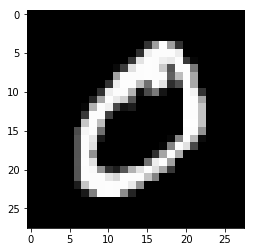

In [30]:
single_image = x_train[1]
plt.imshow(single_image, cmap='gray')

In [31]:
# one hot encoding of output labels
from keras.utils.np_utils import to_categorical
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [32]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
x_train = x_train / x_train.max()  # normalize
x_test = x_test / x_test.max()

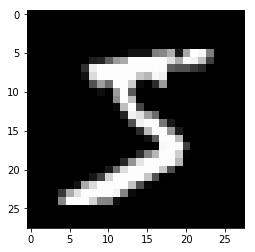

In [35]:
scaled_image = x_train[0]
plt.imshow(scaled_image, cmap='gray')

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [38]:
from keras.models import Sequential

In [39]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# transform conv layer and pooling layer to flatten out (for output layer)
# convert from 2D to 1D
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 43s 713us/step - loss: 0.1349 - acc: 0.9591
Epoch 2/2
60000/60000 [==============================] - 41s 691us/step - loss: 0.0493 - acc: 0.9856


In [43]:
model.metrics_names

['loss', 'acc']

In [44]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 150us/step


[0.047330560741142835, 0.9837]

In [45]:
from sklearn.metrics import classification_report

In [46]:
predictions = model.predict_classes(x_test)

In [47]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.98      0.99      1135
          2       0.95      1.00      0.97      1032
          3       0.98      1.00      0.99      1010
          4       0.99      0.98      0.99       982
          5       0.99      0.98      0.98       892
          6       0.99      0.99      0.99       958
          7       0.99      0.97      0.98      1028
          8       0.99      0.96      0.98       974
          9       0.98      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000

